### PHYS 249 Lab 5: Lookup tables

A **lookup table** is a method for using pre-computed values to speed up the evaluation of a quantity. 

The idea is simple: we evaluate a function $f(x_i)$ for a set of values $x_i$ and store the results $(x_i,f(x_i))$ in a pair of arrays or in a file. Then, to calculate $f(x)$ for some general value, we find two values $[x_i, x_{i+1}]$ that bracket $x$, and interpolate between $f(x_i)$ and $f(x_{i+1})$ to get an estimate for $f(x)$. The accuracy of the result will depend on the order of the interpolation. 

Here we illustrate this idea, starting with linear interpolation.


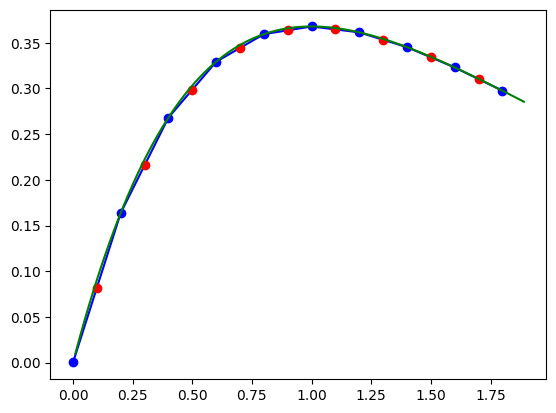

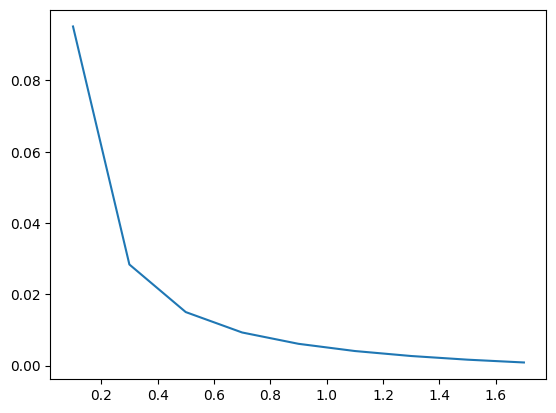

In [25]:
from numpy import exp, arange, zeros
from pylab import plot, show

# take a simple function as an example
def f_of_x(x):
        return x*exp(-x)

# create the initial arrays for the lookup table
xv = arange(0.0001,1.9,0.2)
yv = f_of_x(xv)

def lookup(x,xv,yv):
# performs a linear interpolation on values yv = f(xv), for a value x
# assumes xv is an array of x values, sorted in increasing order
    N = len(xv)

    # check x is in the range [xv[0],xv[N-1]] 
    if x < xv[0]:
        print("error: x < xv[0]")
        return -1
    if x > xv[N-1]:
        print("error: x > xv[N-1]")
        return -1
    # assuming it is, find the index i of the element below it 
    i = 0
    while xv[i+1] < x: #(i.e. while the next point in xv is less than x) 
        i += 1
        #at the end of this loop, x[i+1] is bigger than xv while x[i] is less than xv

    # calculate interpolation weights for upper and lower values
    wl = (xv[i+1] - x)/(xv[i+1]-xv[i])
    wu = (x - xv[i])/(xv[i+1]-xv[i])

    # return weighted average
    y = wl*yv[i] + wu*yv[i+1]
    return(y)

# to test this, plot the initially calculated points
plot(xv,yv,"bo")
plot(xv,yv,"b-")

# now interpolate some points and plot them
nx = arange(0.1,1.8,0.2)
N2 = len(nx)
nyx = zeros(N2)
for i in range(N2):
    nyx[i] = lookup(nx[i],xv,yv)
# plot interpolated points in red
plot(nx,nyx,"ro")

# finally, plot in green better-sampled version of the function
# to check accuracy
xh = arange(0.01,1.9,0.01)
yh = f_of_x(xh)

plot(xh,yh,"g-")
show()

#plot the relative accuracy at each interpolated point
from numpy import abs
fnx = f_of_x(nx)
ex = abs(fnx-nyx)/fnx
plot(nx,ex)
show()

**1)** Edit this code so you can adjust the spacing of the precalculated samples, while keeping the five points at which to calculate interpolated values the same. *hint: figure out what value corresponds to the sample spacing in the code above, and replace it with a variable whose value you can reassign.*


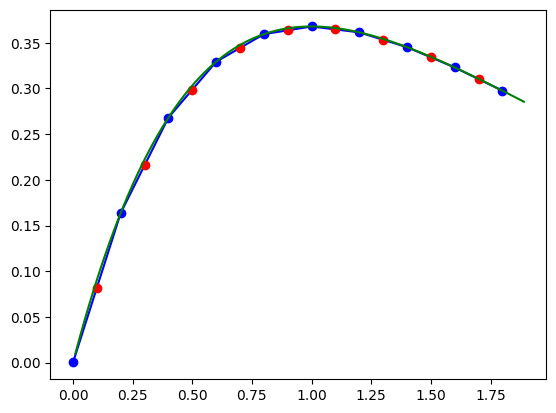

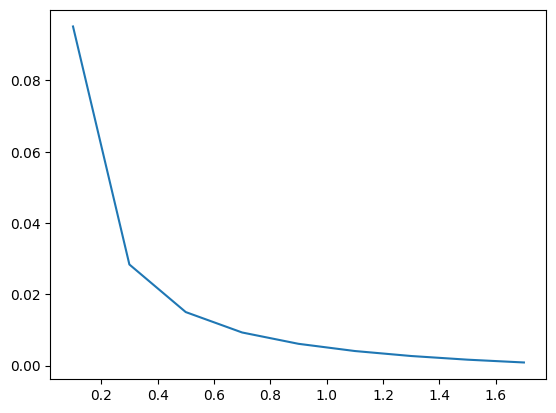

In [26]:
from numpy import exp, arange, zeros
from pylab import plot, show

# spacing = 0.02

# take a simple function as an example
def f_of_x(x):
        return x*exp(-x)


xv = arange(0.0001,1.9,0.2) # changed it here
yv = f_of_x(xv)

def lookupvariablespacing(x, spacing):
     xv = arange(0.0001,1.9,spacing)
     yv = f_of_x(xv)
     return lookup(x, xv, yv)


def lookup(x,xv,yv):
    N = len(xv)
    if x < xv[0]:
        print("error: x < xv[0]")
        return -1
    if x > xv[N-1]:
        print("error: x > xv[N-1]")
        return -1
    i = 0
    while xv[i+1] < x: #(i.e. while the next point in xv is less than x) 
        i += 1
    wl = (xv[i+1] - x)/(xv[i+1]-xv[i])
    wu = (x - xv[i])/(xv[i+1]-xv[i])

    y = wl*yv[i] + wu*yv[i+1]
    return(y)

plot(xv,yv,"bo")
plot(xv,yv,"b-")

nx = arange(0.1,1.8,0.2)
N2 = len(nx)
nyx = zeros(N2)
for i in range(N2):
    # nyx[i] = lookup(nx[i],xv,yv)
    nyx[i] = lookupvariablespacing(nx[i], 0.2)
plot(nx,nyx,"ro")

xh = arange(0.01,1.9,0.01)
yh = f_of_x(xh)

plot(xh,yh,"g-")
show()


from numpy import abs
fnx = f_of_x(nx)
ex = abs(fnx-nyx)/fnx
plot(nx,ex)
show()

**2)** Given the code above, try decreasing the spacing by factors of 3, 9, 27 and 81. Use this to calculate the average relative accuracy of the interpolation, as a function of the sample spacing. The average relative accuracy here can be taken to be:

$$\epsilon = {1 \over N}\sum_i {|r_i - I_i|\over|r_i|} \,,$$        
where $N = 5$ is the total number of interpolated values $I_i$, and $r_i$ are the corresponding real values.

You can either make the code from question **1** a user-defined function that returns the values $r_i$, or one just returns the average relative accuracy.

Plot log10 of the relative accuracy versus log10 of the spacing.

[1.81504251e-02 2.01330227e-03 2.23642251e-04 2.48325185e-05
 2.74305917e-06]


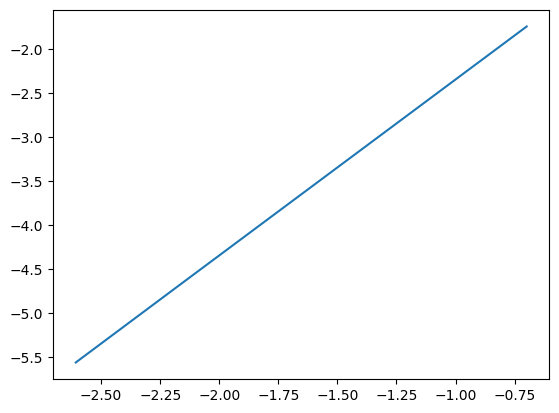

In [27]:
from numpy import log10, array
nx = arange(0.1,1.8,0.2)
nyx = zeros((5, len(nx)))
ogspacing = 0.2
factors = array([1,3,9,27,81])
for i in range(5):
    for j in range(len(nx)):
        nyx[i][j] = lookupvariablespacing(nx[j], ogspacing/factors[i])

errors = zeros(5)
for i in range(5):
    for j in range(len(nx)):
        # print(f_of_x(nx[i]))
        errors[i] += abs((f_of_x(nx[j]) - nyx[i][j]) / f_of_x(nx[j]))
    errors[i] /= len(nx)

print(errors)
lin_err = log10(errors)
plot(log10(ogspacing/factors), lin_err)
show()

**3)** Now rewrite the code to use **cubic** interpolation. This will require sets of 4 pre-computed points around each point where you wish to interpolate; you can write the interpolating function as a sum over basis functions, as explained in the course notes. Remember to skip points if they are too close to the edges; This means you won't be able to sample the first and last intervals.

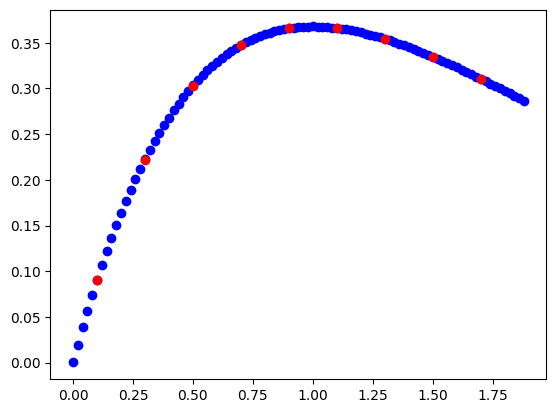

In [28]:
def basis(x, xs, i):
    # print(xs)
    prod = 1
    for j in range(len(xs)):
        if i!=j:
            prod *= (x - xs[j])/(xs[i] - xs[j])

    return prod



def lookupcubicspac(x, spacing):
    xv = arange(0.0001,1.9,spacing)
    yv = f_of_x(xv)
    # print(yv)
    if x < xv[0] or x <= xv[1]:
        print("error")
        return -1
    if x > xv[-1] or x >= xv[-2]:
        print("error")
        return -1

    i = 1
    while xv[i+1] < x:
        i+=1
    
    xs = xv[i - 1 : i + 3]
    w = array([basis(x, xs, j) for j in range(4)])
    # print(w)
    y = sum(w*(yv[i - 1 : i + 3]))
    return y


xt = arange(0.0001,1.9,0.02)
yt = f_of_x(xt)

yi = zeros(len(nx))
for i in range(len(nx)):
    yi[i] = lookupcubicspac(nx[i], 0.02)

plot(xt, yt, "bo")
plot(nx, yi, "ro")
show()

    
    

**4)** Study how the error decreases, as in question *2* above but for cubic interpolation, as we decrease the spacing of the pre-computed points.

Plot (log10 of) the average relative accuracy vs. log10 of the spacing for linear and cubic interpolation together on the same plot to compare them.


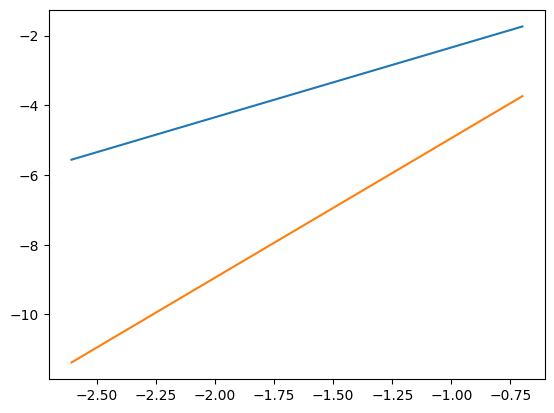

In [32]:
spacings = ogspacing/factors
nx_c = nx[1:-1]
nyx_c = zeros((5, len(nx_c)))
for i in range(5):
    for j in range(len(nx_c)):
        nyx[i][j] = lookupcubicspac(nx_c[j], spacings[i])

errors = zeros(5)
for i in range(5):
    for j in range(len(nx_c)):
        # print(f_of_x(nx[i]))
        errors[i] += abs((f_of_x(nx_c[j]) - nyx[i][j]) / f_of_x(nx_c[j]))
    errors[i] /= len(nx_c)



# nyx_c = zeros((5, len(nx)))
# for i in range(5):
#     for j in range(len(nx)):
#         nyx[i][j] = lookupcubicspac(nx[j], spacings[i])

# errors = zeros(5)
# for i in range(5):
#     for j in range(len(nx)):
#         # print(f_of_x(nx[i]))
#         errors[i] += abs((f_of_x(nx[j]) - nyx[i][j]) / f_of_x(nx[j]))
#     errors[i] /= len(nx)

plot(log10(spacings), lin_err)
plot(log10(spacings), log10(errors))
show()
